In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

# Read Data 
Menggunakan data NYC rolling sales

In [2]:
#read data
df_nyc = pd.read_csv('nyc-rolling-sales.csv')
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Data Cleaning 

In [3]:
# Melihat informasi yang ada pada dataframe 
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
# Check for missing values
df_nyc.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

- Mengubah tipe data ke integer dan date time sesuai dengan kolom yang sudah ditentukan pada variabel convert.

In [5]:
convert = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
convert2 = ['SALE DATE']

for col in convert:
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce').fillna(0).astype('int64')
for col in convert2:
    df_nyc[col] = pd.to_datetime(df_nyc[col], errors='coerce')


df_nyc = df_nyc[df_nyc["SALE PRICE"] != 0]

In [6]:
# Cek kembali tipe data apakah sudah berubah dari data awal
df_nyc.dtypes

Unnamed: 0                                 int64
BOROUGH                                    int64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE          

- Data Cleansing
 
  Menghapus data yang tidak diperlukan.

In [7]:
df_nyc = df_nyc.drop(['Unnamed: 0',
                  'EASE-MENT', 
                  'APARTMENT NUMBER', 
                  'ZIP CODE', ], axis=1)

- Mengubah values pada kolom Borough menjadi nama wilayah sesuai

In [8]:
df_nyc['BOROUGH']=df_nyc.BOROUGH.replace({1:'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Islands'})

In [9]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28
84544,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21
84545,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05
84546,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21


In [10]:
# Mengambil data yang bertipe data integer
df_nyc_int = df_nyc.select_dtypes(include=['int64'])
df_nyc_int

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,392,6,5,0,5,1633,6440,1900,2,6625000
3,402,21,10,0,10,2272,6794,1913,2,3936272
4,404,55,6,0,6,2369,4615,1900,2,8000000
6,406,32,8,0,8,1750,4226,1920,2,3192840
9,387,153,24,0,24,4489,18523,1920,2,16232000
...,...,...,...,...,...,...,...,...,...,...
84543,7349,34,2,0,2,2400,2575,1998,1,450000
84544,7349,78,2,0,2,2498,2377,1998,1,550000
84545,7351,60,2,0,2,4000,1496,1925,1,460000
84546,7100,28,0,7,7,208033,64117,2001,4,11693337


## Measure of Central Tendency & Measure of Spread


### 1. Mean

Berdasarkan pada dataset penjualan properti di wilayah NYC, berapakah rata-rata harga penjualan di masing-masing ?

In [11]:
mean_price = df_nyc.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.mean)
mean_price.sort_values('SALE PRICE',ascending=False, inplace=True)

mean_price

,SALE PRICE
BOROUGH,
Manhattan,3.337951e+06
Brooklyn,1.278964e+06
Bronx,8.034521e+05
Queens,7.399086e+05
Staten Islands,5.434721e+05


Pada data diatas dapat dilihat hasil rata-rata harga penjualan properti pada masing-masing wilayang yang ada di NYC.

### 2. Median

Wilayah manakah yang memiliki median harga penjualan properti tertinggi ?

In [12]:
median_price = df_nyc.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
median_price.sort_values('SALE PRICE',ascending=False, inplace=True)
median_price

,SALE PRICE
BOROUGH,
Manhattan,1150000
Brooklyn,752626
Queens,495000
Staten Islands,465000
Bronx,400000


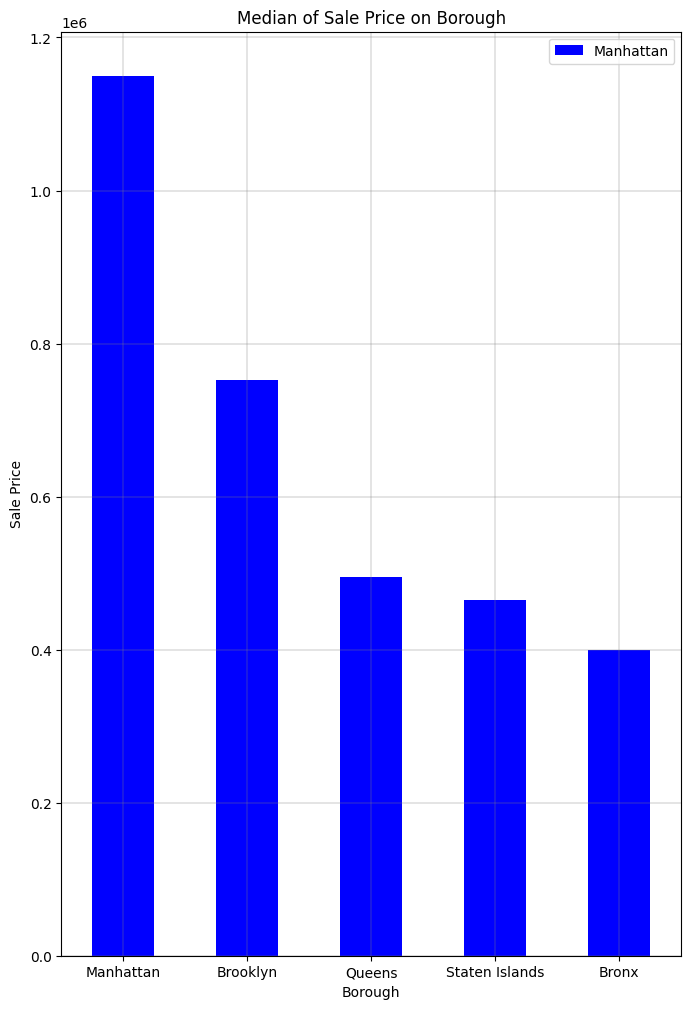

In [13]:
# membuat horizontal bar
median_price.plot(kind='bar', figsize=(8,12),legend = True, color='blue', rot=0)

plt.xlabel("Borough")
plt.ylabel("Sale Price")
plt.legend(labels=median_price.index, loc='upper right')
plt.grid(linewidth=0.3, color="grey")

# membuat dan mengatur ukuran judul
plt.title("Median of Sale Price on Borough")
# menampilkan
plt.show()

Kesimpulan : Berdasarkan data median dari 5 wilayah di NYC didapatkan median harga penjualan tertinggi adalah wilayah Manhattan dengan harga penjualan properti tertinggi sebesar $1150000

### 3. Modus

__Apa category bangunan atau properti dengan penjualan tertinggi di masing-masing wilayah?__

In [14]:
mode_category = df_nyc.pivot_table(index='BOROUGH', values=['BUILDING CLASS CATEGORY'], aggfunc=st.mode)
mode_category.sort_values('BUILDING CLASS CATEGORY',ascending=False, inplace=True)
mode_category.head()

,BUILDING CLASS CATEGORY
BOROUGH,
Manhattan,13 CONDOS - ELEVATOR APARTMENTS
Bronx,02 TWO FAMILY DWELLINGS
Brooklyn,02 TWO FAMILY DWELLINGS
Queens,01 ONE FAMILY DWELLINGS
Staten Islands,01 ONE FAMILY DWELLINGS


Berdasarkan data diatas dapat disimpulkan bahwa :
- Pada wilayah Manhattan category bangunan yang sering terjual adalah bangunan dengan type 13 CONDOS - ELEVATOR APARTEMENTS
- Pada wilayah Bronx dan Brooklyn yang sering terjual adalah bangunan dengan type 02 TWO FAMILY DWELLINGS
- PAda wilayah Queens dam Statend Island yang sering terjual adalah bangunan dengan type 01 ONE FAMILY DWELLINGS

### 4. Range

Berapakah range harga penjualan properti bangunan tertinggi dan terendah serta apa kagetori bangunannya?

In [15]:
df_range = df_nyc.groupby('BUILDING CLASS CATEGORY').agg(
    max_price = pd.NamedAgg(column='SALE PRICE', aggfunc=max),
    min_price = pd.NamedAgg(column='SALE PRICE', aggfunc=min),
    RANGE_PRICE = pd.NamedAgg(
        column="SALE PRICE", 
        aggfunc=lambda x: (max(x) - min(x)))    
)

df_range.sort_values('RANGE_PRICE', ascending=False, inplace=True)
df_range

,max_price,min_price,RANGE_PRICE
BUILDING CLASS CATEGORY,,,
21 OFFICE BUILDINGS,2210000000,1,2209999999
08 RENTALS - ELEVATOR APARTMENTS,620000000,1,619999999
29 COMMERCIAL GARAGES,345000000,1,344999999
27 FACTORIES,257500000,1,257499999
43 CONDO OFFICE BUILDINGS,250867763,10,250867753
26 OTHER HOTELS,174000000,100,173999900
31 COMMERCIAL VACANT LAND,173439705,1,173439704
41 TAX CLASS 4 - OTHER,160000000,2,159999998
11A CONDO-RENTALS,154250000,10,154249990


Berdasarkan data range harga penjualan diatas dapat disimpulkan bahwa :
- Range harga penjualan peoperti bangunan ___tertinggi__ adalah bangunan dengan category 21 OFFICE BUILDING dengan range harga $2209999999
- Range harga penjualan peoperti bangunan ___terendah__ adalah bangunan dengan category 39 TRANSPORTATION FACILITIES dan 11 SPECIAL CONDO BILLING LOTS dengan range harga $0


### 5. Variance

Berapakah variasi dari masing-masing kolom bernilai integer yang ada pada dataset?


In [16]:
# Calculate variance for each column
for column in df_nyc_int:
    variance = df_nyc_int[column].var()
    # Print results
    print(f"Variance of {column}: {variance:.2f}")

Variance of BLOCK: 12737356.86
Variance of LOT: 450032.04
Variance of RESIDENTIAL UNITS: 200.49
Variance of COMMERCIAL UNITS: 96.46
Variance of TOTAL UNITS: 300.60
Variance of LAND SQUARE FEET: 1311533837.94
Variance of GROSS SQUARE FEET: 578605408.98
Variance of YEAR BUILT: 255778.88
Variance of TAX CLASS AT TIME OF SALE: 0.50
Variance of SALE PRICE: 152017322853219.03


Data di atas menunjukkan bahwa dari variasi dengan memerhatikan variasi dari TAX CLASS AT TIME OF SALE memiliki variasi yang rendah.

### 6. Standard Deviation

Berapakah stardar deviasi dari masing-masing kolom bernilai integer yang ada pada dataset?

In [17]:
# Calculate variance for each column
for column in df_nyc_int:
    variance = df_nyc_int[column].std()
    # Print results
    print(f"Standard Deviation of {column}: {variance:.2f}")

Standard Deviation of BLOCK: 3568.94
Standard Deviation of LOT: 670.84
Standard Deviation of RESIDENTIAL UNITS: 14.16
Standard Deviation of COMMERCIAL UNITS: 9.82
Standard Deviation of TOTAL UNITS: 17.34
Standard Deviation of LAND SQUARE FEET: 36215.11
Standard Deviation of GROSS SQUARE FEET: 24054.22
Standard Deviation of YEAR BUILT: 505.75
Standard Deviation of TAX CLASS AT TIME OF SALE: 0.71
Standard Deviation of SALE PRICE: 12329530.52


Standar deviasi pada TAX CLASS AT TIME OF SALE memiliki nilai yang rendah, sehingga titik data cenderung mendekati rata-rata kumpulan data. Sedangkan untuk SALE PRICE memiliki nilai standar deviasi yang tinggi.

## Probability Distributions

In [18]:
# mengambil data wilayah mahattan dengan harga penjualan properti
# pada kisaran harga $1000000 sampai dengan $10000000
df_pd = df_nyc[ 
    (df_nyc['BOROUGH'] == 'Manhattan') &
    (df_nyc['SALE PRICE'] > 1000000) &
    (df_nyc['SALE PRICE'] < 10000000)
]['SALE PRICE']

Text(0.5, 1.0, 'Probability Distribution Histogram')

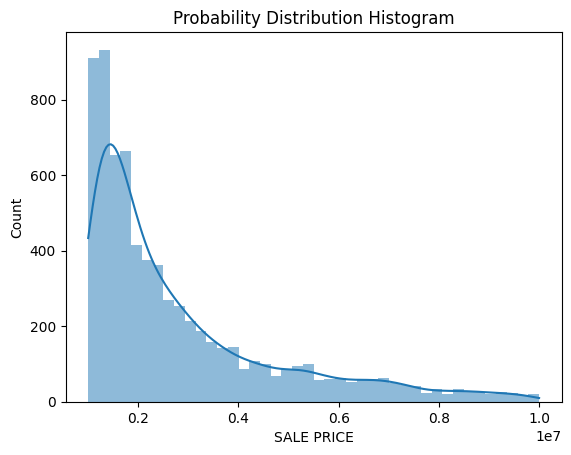

In [19]:
# Membuat histogram dengan garis distribusi menggunakan data yang telah diambil diatas
sns.histplot(data=df_pd, kde=True, edgecolor=None)
plt.title('Probability Distribution Histogram')

Berdasarkan histogram dengan garis distribusi diatas grafik ini dapat dikelompokkan menjadi Ditribusi Gamma.

## Confidence Intervals

Berapa tingkat kepercayaan harga jual keseluruhan properti di NYC?

In [20]:
n = len(df_nyc_int)

sale_price_mean = np.mean(df_nyc_int["SALE PRICE"])
sale_price_std = np.std(df_nyc_int["SALE PRICE"])

# Menemukan CI dengan 95% confidence level
z = stats.t.ppf((1 + 0.95) / 2, n - 1)

# Menghitung CI
confidence_interval = sale_price_mean + (z * (sale_price_std / np.sqrt(n)))

# hasil
print("95% confidence interval for sale price is:", confidence_interval)

95% confidence interval for sale price is: 1593782.1909989247


Berdasarkan sarkan data diatas dapat dilihat bahwa 95% confidence interval untuk Sale Price adalah $1593782.

## Hypotesis Testing

Pengujian ini dilakukan untuk mencari apakah rata-rata harga penjualan di Manhattan dan Brooklyn memiliki nilai harga yang signifikan dari harga rata-rata penjualan properti.

__Uji Coba Hipotesis :__
- H0 = tidak ada perbedaan signifikan antara rata-rata harga penjualan properti di Manhattan dan Brooklyn
- H1 = terdapat perbedaan signifikan antara rata-rata harga penjualan properti di Manhattan dan Brooklyn

In [21]:
manhattan = (df_nyc[df_nyc['BOROUGH'] == 'Manhattan']['SALE PRICE'])
mean_manhattan = np.mean(manhattan)
std_manhattan = np.std(manhattan)
size_manhattan = np.size(manhattan)

print('Mean dari Sale price Manhattan : ', mean_manhattan)
print('Standar deviasi dari Sale price Manhattan ',std_manhattan)
print('Size dari Sale price Manhattan: ',size_manhattan)

Mean dari Sale price Manhattan :  3337951.2707943763
Standar deviasi dari Sale price Manhattan  24096947.583670005
Size dari Sale price Manhattan:  14439


In [22]:
brooklyn = (df_nyc[df_nyc['BOROUGH'] == 'Brooklyn']['SALE PRICE'])
mean_brooklyn = np.mean(brooklyn)
std_brooklyn = np.std(brooklyn)
size_brooklyn= np.size(brooklyn)

print('Mean dari Sale price Manhattan : ', mean_brooklyn)
print('Standar deviasi dari Sale price Manhattan ',std_brooklyn)
print('Size dari Sale price Manhattan: ',size_brooklyn)

Mean dari Sale price Manhattan :  1278963.79069471
Standar deviasi dari Sale price Manhattan  4813728.261835313
Size dari Sale price Manhattan:  15690


In [23]:
# dua sampel data
manhattan_sampel = np.random.normal(loc=mean_manhattan, scale=std_manhattan, size=size_manhattan)
brooklyn_sampel= np.random.normal(loc=mean_brooklyn, scale=std_brooklyn, size=size_brooklyn)

# menghitung t-test dan p-value
t_stat, p_value = stats.ttest_ind(manhattan_sampel, brooklyn_sampel, equal_var=False)

# intrepertasi hasil
if p_value < 0.05:
    print("Hipotesis nol ditolak, ada perbedaan signifikan antara rata-rata harga penjualan properti di Manhattan dan Brooklyn")
else:
    print("Gagal untuk menolak hipotesis nol, tidak ada perbedaan signifikan antara rata-rata harga penjualam di Manhattan dan Brooklyn")

Hipotesis nol ditolak, ada perbedaan signifikan antara rata-rata harga penjualan properti di Manhattan dan Brooklyn


### Overall Conclusion

Berdasarkan beberapa tahap pemrosesan stastistika data diatas dapat disimpulkan :

- Rata-rata harga tertinggi di NYC terdapat di wilayah Manhattan dengan rata-rata harga penjualan properti sebesar $3.379sekian.
- Median dari 5 wilayah di NYC dengan harga penjualan tertinggi adalah wilayah Manhattan dengan harga penjualan properti tertinggi sebesar $1150000
- Modus pada Building Class Category pada 5 wilayah di NYC menunjukkan bahwa categpry bangunan yang memiliki tingkat penjualan tinggi adalah 13 CONDOS - ELEVATOR APARTEMENTS, 02 TWO FAMILY DWELLINGS dan 01 ONE FAMILY DWELLINGS
- Range harga penjualan peoperti bangunan tertinggi yang diambil dari keseluruhan data adalah bangunan dengan category 21 OFFICE BUILDING dengan range harga $2209999999
- Data varian pada seluruh kolom pada dataset menunjukkan bahwa TAX CLASS AT TIME OF SALE memiliki varian yang paling rendah
- Data standard deviasi pada TAX CLASS AT TIME OF SALE juga menunjukkan rendah, sehingga titik data cenderung mendekati rata-rata kumpulan data
- Berdasarkan histogram dengan garis distribusi dengan menggunakan data harga penjualan di wilayah Manhatan dengan rangg harga kisaran $1000000 hingga %10000000, grafik probability distributions yang dihasilkan dapat dikelompokkan menjadi Ditribusi Gamma.
- 95% confidence interval untuk Sale Price adalah $1593782.
- Pengujian hypothesis testing pada wilayah yang memiliki sale price yang tinggi yaitu Manhattan dan Brooklyn menunjukkan bahwa terdapat perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Manhattan dan Brooklyn.
